#### Importing libraries and data ####

In [122]:
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
from scipy.stats import kstest, anderson, chisquare, shapiro
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings(action='once')
data_red = pd.read_csv('~/frida_ml_repo/rm_ucl/msc_dsml/intro_to_stat_ds/assignment/data/winequality-red.csv',delimiter=';')
data_white = pd.read_csv('~/frida_ml_repo/rm_ucl/msc_dsml/intro_to_stat_ds/assignment/data/winequality-white.csv',delimiter=';')

#### Setting masks ####

In [108]:
mask_low_red = (data_red['quality']<=4)
mask_mid_red = ((data_red['quality']>4) & (data_red['quality']<7))
mask_high_red = (data_red['quality']>=7)

mask_low_white = (data_white['quality']<=4)
mask_mid_white = ((data_white['quality']>4) & data_white['quality']<7)
mask_high_white = (data_white['quality']>=7)

#### Defining functions ####

In [123]:
def chisquare_func(mask_variable,column_variable,data_variable,bin_number=5,freedegree=1):

    data_to_use = data_variable[mask_variable]
    data_to_use['Bin'] = pd.cut(data_to_use[column_variable], data_to_use[column_variable].quantile(np.linspace(0.1,1,bin_number)).values)

    normal_data = np.random.normal(data_to_use[column_variable].mean(),data_to_use[column_variable].std(),len(data_to_use))
    normal_df = pd.DataFrame(normal_data,columns = [column_variable])
    normal_df['Bin'] = pd.cut(normal_df[column_variable], normal_df[column_variable].quantile(np.linspace(0.1,1,bin_number)).values)

    data_test = data_to_use.groupby('Bin').count()[column_variable]
    normal_test = normal_df.groupby('Bin').count()[column_variable]
    
    min_data_test = np.min(data_test.values)
    min_normal_test = np.min(normal_test.values)
    
    statistic , p_value = chisquare(data_test,normal_test,ddof=freedegree) 
    
    print('the min count in a bin is {}'.format(np.min([min_data_test,min_normal_test])))
    print('the degrees of freedom used is {}'.format(freedegree))
    
    return statistic, p_value

def ks_func(mask_variable,column_variable,data_variable):

    data_to_use = data_variable[mask_variable][column_variable]

    statistic , p_value = kstest(data_to_use, 'norm', args=(data_to_use.mean(), data_to_use.std()))   
    
    return statistic, p_value

def anderson_func(mask_variable,column_variable,data_variable):

    data_to_use = data_variable[mask_variable][column_variable]

    return anderson(data_to_use, 'norm')   

def shapiro_func(mask_variable,column_variable,data_variable):

    data_to_use = data_variable[mask_variable][column_variable]

    return shapiro(data_to_use)   

def compare_plot(mask_variable,column_variable,data_variable):
    
    data_to_use = data_variable[mask_variable][column_variable]

    rvs = np.random.normal(data_to_use.mean(),data_to_use.std(),len(data_to_use))
    
    norm_cdf = scipy.stats.norm.cdf(rvs)
    observed_cdf = scipy.stats.norm.cdf(data_to_use)
    
    sns.lineplot(x=rvs, y=norm_cdf)
    sns.lineplot(x=data_to_use, y=observed_cdf)
    plt.show()

In [124]:
def new_chisquare_func(mask_variable,column_variable,data_variable,bin_number=5,freedegree=1):

    bin_number = bin_number+1
    data_to_use = data_variable[mask_variable]
    data_to_use['Bin'] = pd.cut(data_to_use[column_variable], data_to_use[column_variable].quantile(np.linspace(0.00000,1,bin_number)).values)

    normal_data = np.random.normal(data_to_use[column_variable].mean(),data_to_use[column_variable].std(),len(data_to_use)*100000)
    normal_df = pd.DataFrame(normal_data,columns = [column_variable])
    normal_df['Bin'] = pd.cut(normal_df[column_variable], data_to_use[column_variable].quantile(np.linspace(0.00000,1,bin_number)).values) # use same bin as observed

    data_test = data_to_use.groupby('Bin').count()[column_variable]
    data_test[0] = data_test.copy()[0]+1
    normal_test = normal_df.groupby('Bin').count()[column_variable]
    normal_test /= 100000.0
    
    min_data_test = np.min(data_test.values)
    min_normal_test = np.min(normal_test.values)
    
    statistic , p_value = chisquare(data_test,normal_test,ddof=freedegree) 
    
    print('the min count in a bin is {}'.format(np.min([min_data_test,min_normal_test])))
    print('the degrees of freedom used is {}'.format(freedegree))
    
    return statistic, p_value

#### Examples ####

#### Testing the low and high quality subsets of the data using standard tests

In [125]:
anderson_func(mask_variable=mask_high_red,column_variable='pH',data_variable=data_red)

AndersonResult(statistic=1.0104986663271234, critical_values=array([0.566, 0.644, 0.773, 0.902, 1.073]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [126]:
new_chisquare_func(mask_variable=mask_low_red,column_variable='pH',data_variable=data_red,bin_number=4,freedegree=2)

<ipython-input-124-92b8e3c6697f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_to_use['Bin'] = pd.cut(data_to_use[column_variable], data_to_use[column_variable].quantile(np.linspace(0.00000,1,bin_number)).values)


the min count in a bin is 11.04031
the degrees of freedom used is 2


(6.971231092989905, 0.008283049139792756)

In [105]:
ks_func(mask_variable=mask_high_red,column_variable='pH',data_variable=data_red)

(0.059607962745335086, 0.407821834485401)

In [132]:
shapiro_func(mask_variable=mask_low_red,column_variable='pH',data_variable=data_red)

ShapiroResult(statistic=0.9542158842086792, pvalue=0.019917160272598267)

##### What one sees is that we reject the null hypothesis of normality for all tests bar the kolmogorov smirnov test ... (write about why this is)

###### Splitting the data into smaller subsets however... cannot reject normality

In [147]:
hail_mary_split = 'density'
shapiro(data_red[(data_red[hail_mary_split]>data_red[hail_mary_split].mean()) & (data_red['quality']>=7)]['pH'])

ShapiroResult(statistic=0.9842842817306519, pvalue=0.4165293574333191)

###### Also looking at the distribution of the log of the pH values

In [151]:
shapiro(np.log(data_red[mask_high_red]['pH']))

ShapiroResult(statistic=0.9881590604782104, pvalue=0.06957180052995682)

In [152]:
kstest(np.log(data_red[mask_high_red]['pH']), 'norm', args=(np.log(data_red[mask_high_red]['pH']).mean(), np.log(data_red[mask_high_red]['pH']).std()))   

KstestResult(statistic=0.05651450169434502, pvalue=0.47512455332556935)

In [155]:
anderson(np.log(data_red[mask_high_red]['pH']), 'norm')   

AndersonResult(statistic=0.7994471063447577, critical_values=array([0.566, 0.644, 0.773, 0.902, 1.073]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [134]:
data_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### Plots for project ####

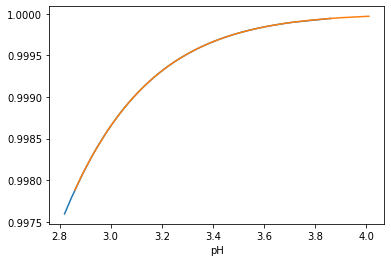

In [97]:
compare_plot(mask_mid_red,'pH',data_red)